In [130]:
import pickle
import numpy as np

In [131]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [132]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [133]:
type(test_data)

list

In [134]:
type(train_data)

list

In [135]:
len(train_data)

10000

In [136]:
len(test_data)

1000

In [137]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [138]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [139]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [140]:
train_data[0][2]

'no'

In [141]:
all_data = test_data + train_data

In [142]:
len(all_data)

11000

In [143]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [144]:
vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [145]:
vocab.add('no')

In [146]:
vocab.add('yes')

In [147]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [148]:
vocab_len = len(vocab) + 1

In [149]:
vocab_len

38

In [150]:
# LONGEST STORY
all_stroy_lens = [len(data[0]) for data in all_data]

In [151]:
max_story_len = max(all_stroy_lens)

In [152]:
max_question_len = max([len(data[1]) for data in all_data])

In [153]:
max_question_len

6

In [154]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [155]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [156]:
tokenizer.word_index

{'picked': 1,
 'moved': 2,
 'kitchen': 3,
 'left': 4,
 'john': 5,
 'travelled': 6,
 'up': 7,
 'yes': 8,
 'no': 9,
 'in': 10,
 '.': 11,
 'mary': 12,
 'the': 13,
 'down': 14,
 'grabbed': 15,
 'dropped': 16,
 'bathroom': 17,
 'is': 18,
 'journeyed': 19,
 'went': 20,
 'office': 21,
 'sandra': 22,
 '?': 23,
 'put': 24,
 'daniel': 25,
 'garden': 26,
 'back': 27,
 'milk': 28,
 'took': 29,
 'there': 30,
 'apple': 31,
 'got': 32,
 'football': 33,
 'hallway': 34,
 'discarded': 35,
 'bedroom': 36,
 'to': 37}

In [157]:
train_story_text = []
train_question_text = []
train_answers = []

In [158]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [159]:
# train_story_text

In [160]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [161]:
len(train_story_seq)

10000

In [162]:
len(train_story_text)

10000

In [163]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    
    # STORIES = X
    X = []
    # QUESTIONS Xq
    Xq = []
    # Y CORRECT ANSWER (yes/no)
    Y = []
    
    for story,query,answer in data:
        
        # for each story [23,14,...]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index)+1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [164]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [165]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [166]:
inputs_test

array([[ 0,  0,  0, ..., 13, 36, 11],
       [ 0,  0,  0, ..., 13, 26, 11],
       [ 0,  0,  0, ..., 13, 26, 11],
       ...,
       [ 0,  0,  0, ..., 13, 31, 11],
       [ 0,  0,  0, ..., 13, 26, 11],
       [ 0,  0,  0, ..., 31, 30, 11]])

In [167]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
tokenizer.word_index['yes']

8

In [169]:
tokenizer.word_index['no']

9

In [170]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497., 503.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [171]:
from keras.models import Sequential,Model

In [172]:
from keras.layers import Embedding

In [173]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [174]:
# PLACEHOLDER shape=(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [175]:
# vocab_len
vocab_size = len(vocab) + 1

In [176]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# OUTPUT
# (samples,story_maxLen,embedding_dim)

In [177]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# OUTPUT
# (samples,story_maxLen,max_question_Len)

In [178]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# (samples,query_maxLen,embedding_dim)

In [179]:
# ENCODED <--- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [180]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [181]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [182]:
answer = concatenate([response,question_encoded])

In [183]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_2')>

In [184]:
answer = LSTM(32)(answer)

In [185]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (samples,vocab_size) # YES/ NO 0000

In [186]:
answer = Activation('softmax')(answer)

In [187]:
model = Model([input_sequence,question],answer)

In [188]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [189]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_7 (Sequential)   (None, None, 64)             2432      ['input_5[0][0]']             
                                                                                                  
 sequential_9 (Sequential)   (None, 6, 64)                2432      ['input_6[0][0]']             
                                                                                            

In [190]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=100,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/100
313/313 [==============================] - 7s 13ms/step - loss: 0.8826 - accuracy: 0.4973 - val_loss: 0.6952 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.7070 - accuracy: 0.5027 - val_loss: 0.6952 - val_accuracy: 0.5030
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6988 - accuracy: 0.4973 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6971 - accuracy: 0.4963 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6957 - accuracy: 0.5048 - val_loss: 0.6937 - val_accuracy: 0.5030
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6955 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6957 - accuracy: 0.4976 - val_loss: 0.6933 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


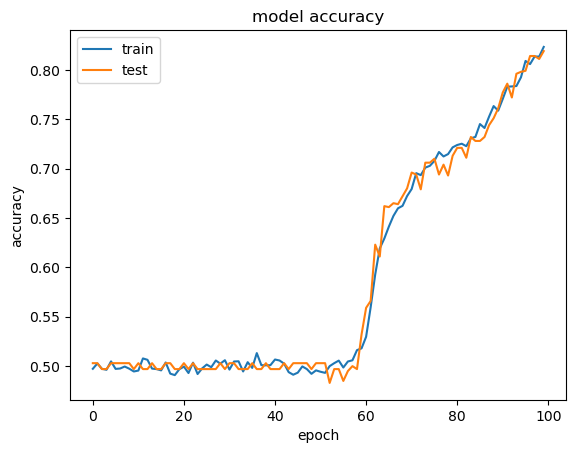

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [193]:
model.save('mybrandnewmodel.h5')

C:\Users\PC\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [194]:
pred_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 1s 4ms/step


In [196]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [200]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [201]:
test_data[0][2]

'no'

In [197]:
pred_results

array([[5.59161492e-07, 5.73011505e-07, 5.25936230e-07, ...,
        6.15252475e-07, 6.09021299e-07, 5.77581716e-07],
       [2.45614956e-07, 2.90022655e-07, 2.67388316e-07, ...,
        3.30578132e-07, 2.78515216e-07, 2.93948290e-07],
       [2.87809296e-08, 2.66381228e-08, 2.94232390e-08, ...,
        2.96783416e-08, 3.43171429e-08, 3.32155423e-08],
       ...,
       [2.06570076e-06, 1.85314866e-06, 1.85860699e-06, ...,
        1.82518909e-06, 1.80717086e-06, 1.97151894e-06],
       [1.97935819e-08, 1.65115246e-08, 1.92147755e-08, ...,
        1.88036360e-08, 2.27909212e-08, 2.01673149e-08],
       [9.85203386e-08, 8.59700791e-08, 9.83018538e-08, ...,
        8.82996787e-08, 1.19342388e-07, 1.01507055e-07]], dtype=float32)

In [198]:
pred_results.shape

(1000, 38)

In [199]:
pred_results[0]

array([5.5916149e-07, 5.7301150e-07, 5.2593623e-07, 5.7900127e-07,
       4.6452584e-07, 6.2501397e-07, 5.8381966e-07, 4.9468616e-07,
       1.6013059e-01, 8.3984852e-01, 5.0299030e-07, 6.3289190e-07,
       5.3946519e-07, 6.7405301e-07, 5.8141268e-07, 5.4978210e-07,
       6.2918235e-07, 5.8915214e-07, 5.6384266e-07, 5.8792523e-07,
       5.7852219e-07, 5.5247000e-07, 6.6496989e-07, 5.2786180e-07,
       5.8907011e-07, 5.4766798e-07, 6.2981752e-07, 6.3475119e-07,
       5.2489406e-07, 5.5839513e-07, 6.4945812e-07, 6.2553158e-07,
       5.8909825e-07, 5.7180068e-07, 5.7819784e-07, 6.1525247e-07,
       6.0902130e-07, 5.7758172e-07], dtype=float32)

In [202]:
val_max = np.argmax(pred_results[0])

In [203]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [204]:
k

'no'

In [205]:
pred_results[0][val_max]

0.8398485

In [206]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [207]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [208]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [209]:
my_question = "Is the football in the garden ?"

In [210]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [211]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [212]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [213]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [214]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,
         4, 13,  3, 11, 22, 16, 13, 33, 10, 13, 26, 11]])

In [215]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [216]:
pred_results = model.predict(([my_story,my_ques]))

1/1 [==============================] - 0s 60ms/step


In [217]:
val_max = np.argmax(pred_results[0])

In [218]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [219]:
k

'yes'

In [220]:
pred_results[0][val_max]

0.94495314